##### Importing Libraries


In [ ]:
import numpy as np
from cnn_layers.cnn import CNN
from cnn_layers.convlayers import Conv2D
from cnn_layers.pooling import MaxPool2D
from cnn_layers.flatten import Flatten
from ann_layers.dense import Dense
from utils.activation import ReLU, Softmax
from ann_layers.dropout import Dropout
from data_loaders.CNN_data_loader import load_dataset
from utils.visualization import plot_training_history, display_sample_predictions

##### LOADING DATASET


In [2]:
print("Loading dataset...")
train_path = "C:\\Users\\ysaip\\Music\\ANN\\train"
val_path = "C:\\Users\\ysaip\\Music\\ANN\\valid"    
X_train, y_train = load_dataset(train_path,augment=True, augment_factor=2)
X_val, y_val = load_dataset(val_path,augment=True, augment_factor=2)

Loading dataset...
Loading dataset...
Loading class Apple___Apple_scab...
Loaded 4032 images for class Apple___Apple_scab
Loading class Apple___Black_rot...
Loaded 3974 images for class Apple___Black_rot
Loading class Apple___Cedar_apple_rust...
Loaded 3520 images for class Apple___Cedar_apple_rust
Loading class Apple___healthy...
Loaded 4016 images for class Apple___healthy
Total loaded 15542 images from 4 classes
Final data shape: (15542, 3, 128, 128)
Loading dataset...
Loading class Apple___Apple_scab...
Loaded 1008 images for class Apple___Apple_scab
Loading class Apple___Black_rot...
Loaded 994 images for class Apple___Black_rot
Loading class Apple___Cedar_apple_rust...
Loaded 880 images for class Apple___Cedar_apple_rust
Loading class Apple___healthy...
Loaded 1004 images for class Apple___healthy
Total loaded 3886 images from 4 classes
Final data shape: (3886, 3, 128, 128)


In [3]:
# Standardize your data properly
X_train = (X_train - np.mean(X_train)) / (np.std(X_train) + 1e-8)
X_val = (X_val - np.mean(X_val)) / (np.std(X_val) + 1e-8)

##### MAKING CNN ARCHITECTURE


In [ ]:
input_shape = (3, 128, 128)
model = CNN(input_shape, learning_rate=0.0005)

model.add(Conv2D(32, kernel_size=3, stride=1, padding=1))
model.add(ReLU())
model.add(Conv2D(32, kernel_size=3, stride=1, padding=1))
model.add(ReLU())
model.add(MaxPool2D(pool_size=2, stride=2))

model.add(Conv2D(64, kernel_size=3, stride=1, padding=1))
model.add(ReLU())
model.add(Conv2D(64, kernel_size=3, stride=1, padding=1))
model.add(ReLU())
model.add(MaxPool2D(pool_size=2, stride=2))

model.add(Conv2D(128, kernel_size=3, stride=1, padding=1))
model.add(ReLU())
model.add(Conv2D(128, kernel_size=3, stride=1, padding=1))
model.add(ReLU())
model.add(MaxPool2D(pool_size=2, stride=2))

model.add(Conv2D(256, kernel_size=3, stride=1, padding=1))
model.add(ReLU())
model.add(Conv2D(256, kernel_size=3, stride=1, padding=1))
model.add(ReLU())
model.add(MaxPool2D(pool_size=2, stride=2))

model.add(Conv2D(512, kernel_size=3, stride=1, padding=1))
model.add(ReLU())
model.add(Conv2D(512, kernel_size=3, stride=1, padding=1))
model.add(ReLU())
model.add(MaxPool2D(pool_size=2, stride=2))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(8192, 2048))
model.add(ReLU())
model.add(Dropout(0.4))
model.add(Dense(2048, 1024)) 
model.add(ReLU())
model.add(Dropout(0.4))

model.add(Dense(1024, 38))
model.add(Softmax())


##### TRAINING BEGINS


In [12]:

print("Training the model...")
model.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=32)

Training the model...
Training data shape: (15542, 3, 128, 128)
Validation data shape: (3886, 3, 128, 128)


Epoch 0/20: 100%|██████████| 486/486 [3:58:25<00:00, 29.44s/it, loss=0.9087, lr=0.000250]  



Epoch 0/20
Train Loss: 0.2407, Train Acc: 0.9485
Val Loss: 0.2829, Val Acc: 0.9362


Epoch 1/20:   5%|▍         | 22/486 [06:47<2:23:17, 18.53s/it, loss=0.9303, lr=0.000500]


KeyboardInterrupt: 

##### TESTING ON OTHER DATA


In [15]:
y_pred = model.predict(X_val)

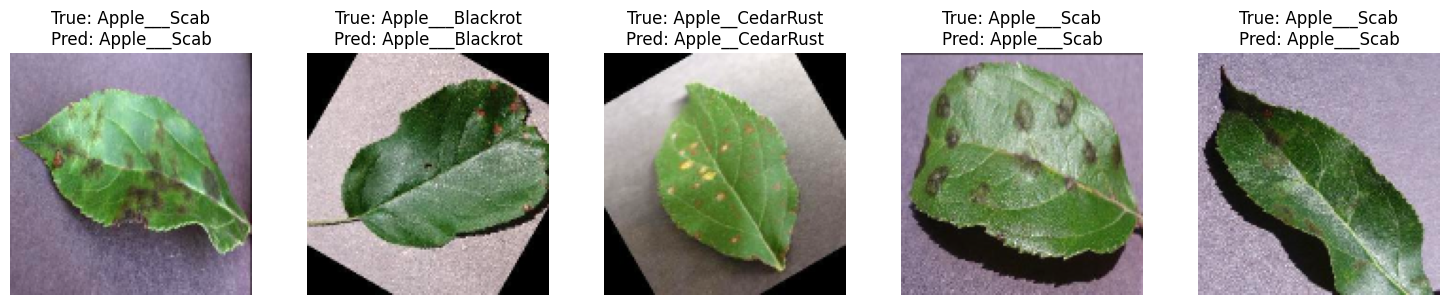

In [18]:
class_names = ['Apple___Scab', 'Apple___Blackrot',  'Apple__CedarRust','Apple___Healthy']  # Replace with your class names
display_sample_predictions(X_val, y_val, y_pred, class_names)